In [35]:
# Nettoyage et redémarrage propre
import importlib
import sys

# Vider le cache d'importation si nécessaire
if 'flight_delay_predictor' in sys.modules:
    importlib.reload(sys.modules['flight_delay_predictor'])

# Clear des outputs précédents
from IPython.display import clear_output
clear_output(wait=True)

print("🧹 Environnement nettoyé - prêt pour l'exécution")

from flight_delay_predictor import FlightDelayPredictor

🧹 Environnement nettoyé - prêt pour l'exécution


In [36]:
# Initialisation
predictor = FlightDelayPredictor(
        delay_threshold=15,
        sample_size=400000, 
        random_state=42,
        )

# Chargement et préparation des données
df = predictor.load_and_prepare_csv("C:/Temp/data-all 2025-11-07.csv")

def train_modele(predictor, df, nom_modele, save_model=False, show_plots=True):
    """
    Entraîne un modèle et optionnellement affiche les graphiques.
    
    Args:
        predictor: Instance FlightDelayPredictor
        df: DataFrame avec les données
        nom_modele: Type de modèle ('xgboost_tuned', 'random_forest', etc.)
        save_model: Sauvegarder le modèle
        show_plots: Afficher les graphiques de performance
    """
    if show_plots:
        # Utilise la méthode tout-en-un qui référence les autres méthodes
        metrics = predictor.train_and_plot(df, model_type=nom_modele, show_plots=True)
    else:
        print("🎯 Lancement de l'entraînement...")
        metrics = predictor.train(df, model_type=nom_modele)
    
    if save_model:
        predictor.save_model()
        print("✅ Modèle sauvegardé.")

    return metrics

✅ Données chargées: 642,391 lignes
  ✅ Heure 2025-10-20 14:00:00: 275 vols - 275 status_final valides
  ✅ Heure 2025-10-20 15:00:00: 1645 vols - 1640 status_final valides
  ✅ Heure 2025-10-20 16:00:00: 1590 vols - 1585 status_final valides
  ✅ Heure 2025-10-20 17:00:00: 1739 vols - 1733 status_final valides
  ✅ Heure 2025-10-20 18:00:00: 1708 vols - 1702 status_final valides
  ✅ Heure 2025-10-20 19:00:00: 1699 vols - 1696 status_final valides
  ✅ Heure 2025-10-20 20:00:00: 1336 vols - 1334 status_final valides
  ✅ Heure 2025-10-20 21:00:00: 1175 vols - 1172 status_final valides
  ✅ Heure 2025-10-20 22:00:00: 1132 vols - 1122 status_final valides
  ✅ Heure 2025-10-20 23:00:00: 1189 vols - 1182 status_final valides
  ✅ Heure 2025-10-21 00:00:00: 932 vols - 866 status_final valides
  ✅ Heure 2025-10-21 01:00:00: 874 vols - 870 status_final valides
  ✅ Heure 2025-10-21 02:00:00: 732 vols - 729 status_final valides
  ✅ Heure 2025-10-21 03:00:00: 798 vols - 787 status_final valides
  ✅ Heure

🚀 Début de l'entraînement du modèle xgboost_tuned...
🔄 Rééquilibrage des classes avec SMOTEENN...
  Distribution avant: {0: np.int64(267240), 1: np.int64(32760)}
🔄 Rééquilibrage des classes avec SMOTEENN...
  Distribution avant: {0: np.int64(267240), 1: np.int64(32760)}
  Distribution après: {0: np.int64(267240), 1: np.int64(258416)}
  ✅ SMOTEENN appliqué avec succès
  Création du modèle: xgboost_tuned
  Ratio de déséquilibre: 8.2:1
  Entraînement du modèle...
  Distribution après: {0: np.int64(267240), 1: np.int64(258416)}
  ✅ SMOTEENN appliqué avec succès
  Création du modèle: xgboost_tuned
  Ratio de déséquilibre: 8.2:1
  Entraînement du modèle...
  🎯 Seuil optimal: 0.804 (F1: 0.322)
  📊 Seuils de risque calculés automatiquement:
     • Faible/Modéré: 0.581
     • Modéré/Élevé:  0.804
     → Basés sur: médiane(pas retard)=0.581, médiane(retard)=0.714

📊 MÉTRIQUES DE PERFORMANCE:
  ROC-AUC: 0.706
  PR-AUC: 0.304
  F1-Score: 0.322
  Précision: 0.326
  Rappel: 0.319

🔍 ANALYSE DE L'OVE

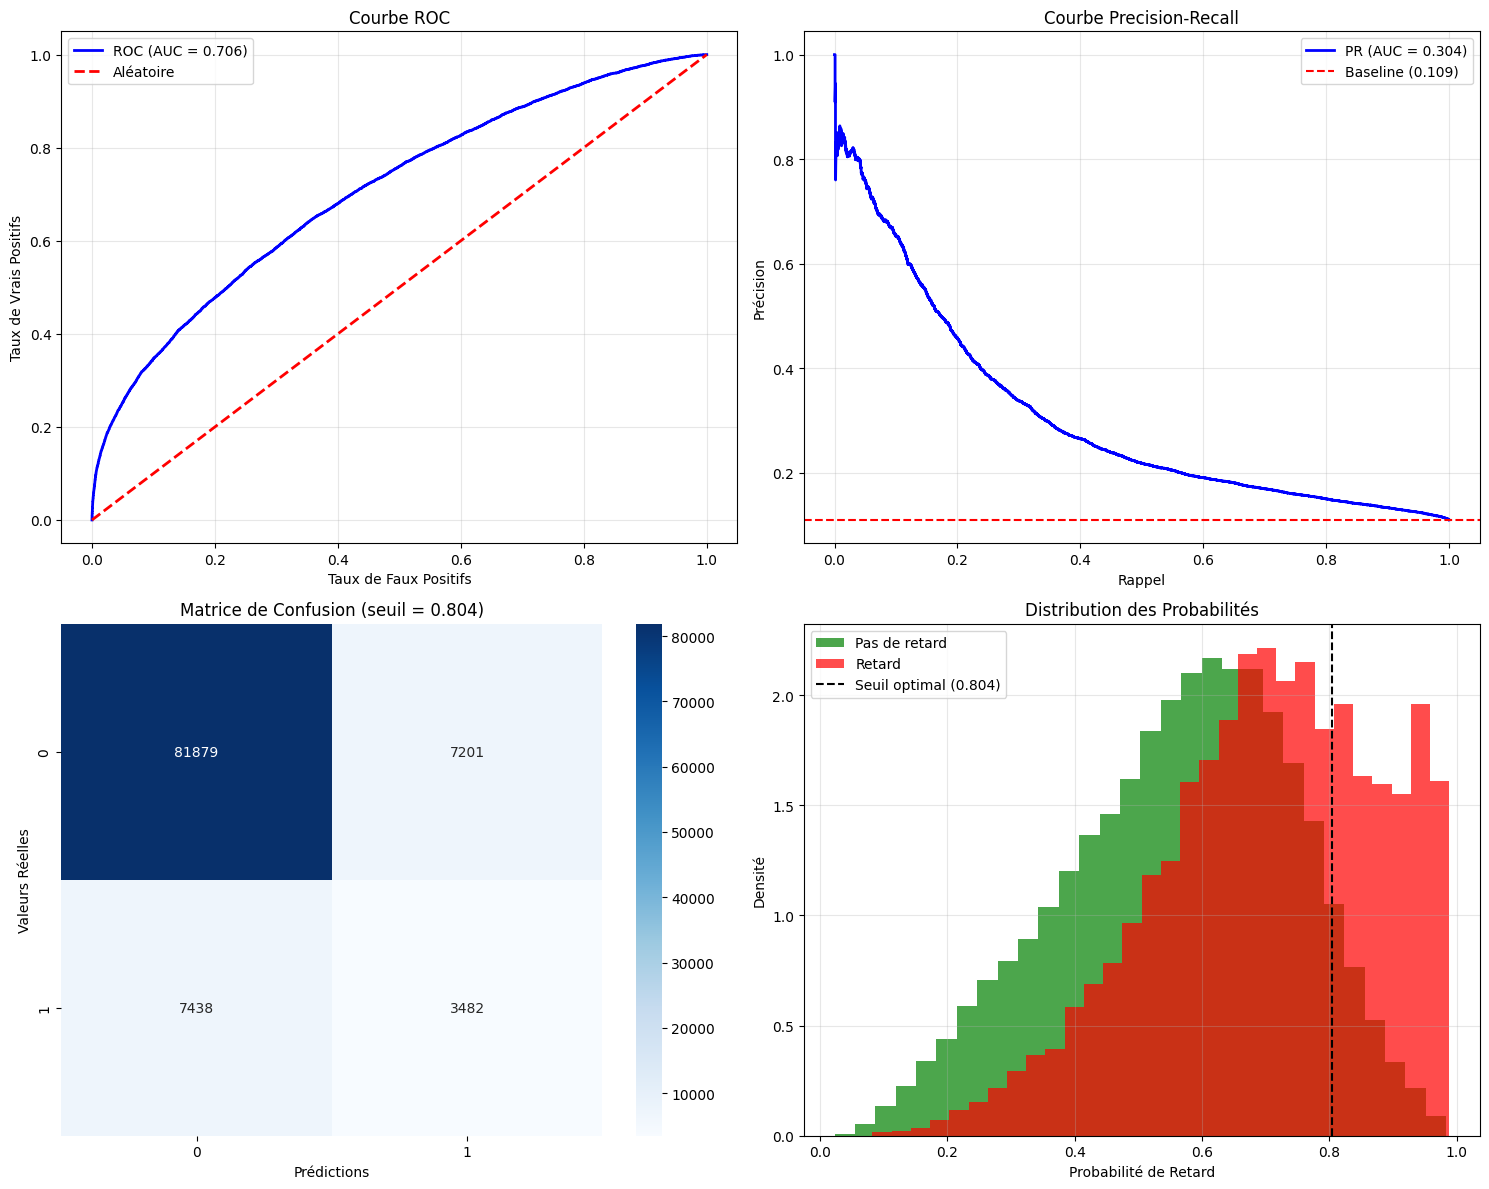

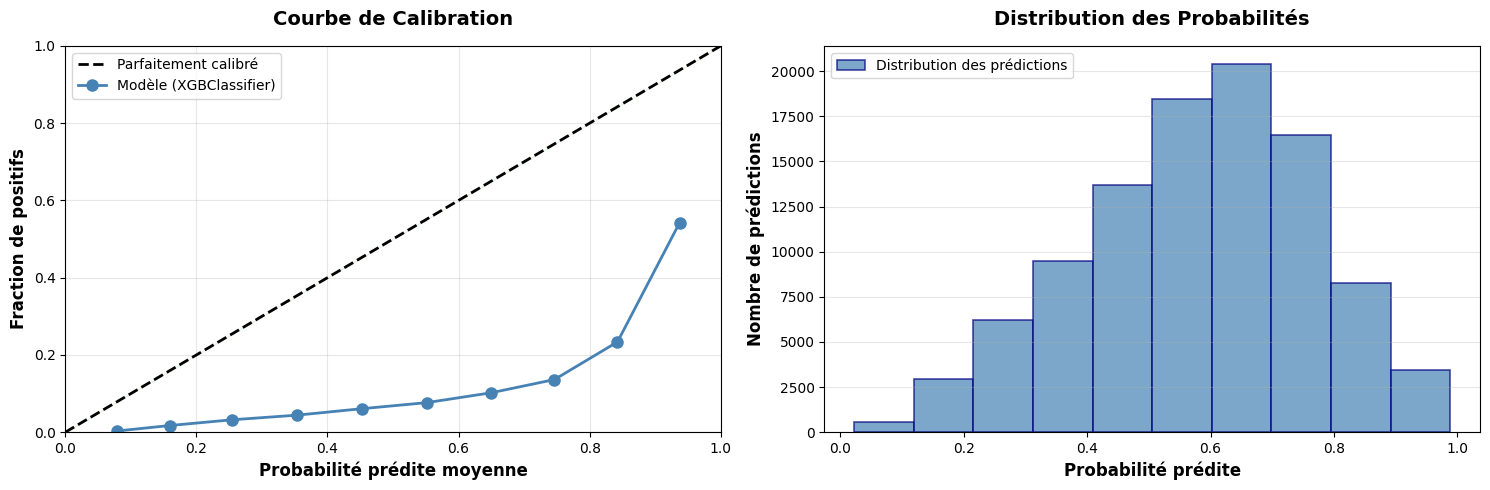

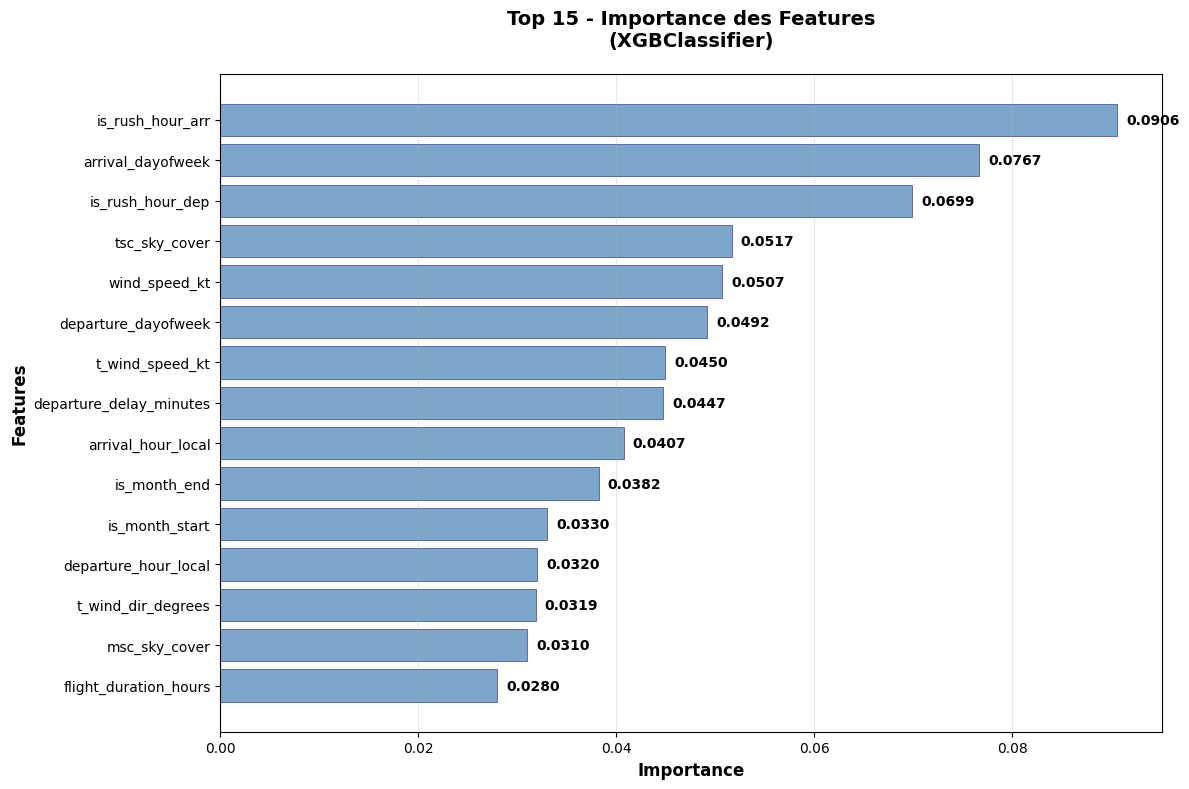


📈 STATISTIQUES:
   • Total features: 58
   • Top 15 couvrent 71.3% de l'importance totale
   • Feature la plus importante: is_rush_hour_arr (0.0906)


In [37]:

metrics = train_modele(predictor, df, "xgboost_tuned", save_model=False)
# metrics = train_modele(predictor, df, "lightgbm")
# metrics = train_modele(predictor, df, "random_forest")
# metrics = train_modele(predictor, df, "decision_tree")
# metrics = train_modele(predictor, df, "logistic_regression")
# metrics = train_modele(predictor, df, "knn")
# metrics = train_modele(predictor, df, "xgboost")